<a href="https://colab.research.google.com/github/GeneralZl1/Feature_Engineering/blob/main/ImbalanceDataSet_CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install imbalanced_learn

In [13]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/data/creditcard.csv")

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.shape

(284807, 31)

In [16]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
 df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
x_noSamp=df.iloc[:,0:-1]
y_noSamp=df.iloc[:,-1]

No UnderSampling

In [19]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# function to generate a report of metrics
def generate_report(y_actual,y_predicted):
  report={'accuracy':accuracy_score(y_actual,y_predicted),'precision':precision_score(y_actual,y_predicted),'recall':recall_score(y_actual,y_predicted),'f1_score':f1_score(y_actual,y_predicted)}
  return report

In [21]:
x_noSamp_train,x_noSamp_test,y_noSamp_train,y_noSamp_test=train_test_split(x_noSamp,y_noSamp,train_size=0.7)

In [22]:
scaler_noSamp=StandardScaler()
x_noSamp_train_sc=scaler_noSamp.fit_transform(x_noSamp_train)
x_noSamp_test_sc=scaler_noSamp.fit_transform(x_noSamp_test)

In [23]:
LR_noSamp=LogisticRegression().fit(x_noSamp_train_sc,y_noSamp_train)

In [25]:
pred_noSamp=LR_noSamp.predict(x_noSamp_test_sc)

In [26]:
print(generate_report(y_noSamp_test,pred_noSamp))

{'accuracy': 0.9991105181231933, 'precision': 0.8854166666666666, 'recall': 0.5666666666666667, 'f1_score': 0.6910569105691056}


UnderSampling

In [27]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
x_uSamp=df.iloc[:,0:-1]
y_uSamp=df.iloc[:,-1]

In [29]:
minor_class_len = len(y_uSamp[y_uSamp == 1])

In [30]:
major_class_indices=y_uSamp[y_uSamp == 0].index

In [31]:
random_major_class_indices=np.random.choice(major_class_indices,minor_class_len,replace=False)

In [32]:
minor_class_indices=y_uSamp[y_uSamp == 1].index

In [33]:
major_minor_indices=np.concatenate([random_major_class_indices,minor_class_indices])

In [34]:
undersample_df=df.loc[major_minor_indices]

In [35]:
undersample_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
242715,151612.0,-1.491653,0.952408,-0.470590,0.378938,-0.408883,0.999540,0.948148,0.948335,-0.362067,-1.066266,-0.913052,-0.092200,-2.079032,0.947927,-2.301816,-0.298420,0.097462,0.574890,0.423078,-0.433409,0.244657,0.576821,-0.296185,0.215958,0.696608,-0.367890,-0.186555,-0.091445,215.41,0
228336,145471.0,2.046765,0.302346,-1.919190,1.054223,0.782079,-0.914982,0.678595,-0.326796,-0.343515,0.547150,0.645886,0.601610,-0.457003,1.054581,-0.415376,-0.165955,-0.734386,0.127291,-0.039837,-0.296395,0.152173,0.519656,-0.053893,-0.404143,0.462810,-0.477038,-0.034608,-0.078544,1.99,0
262692,160603.0,2.154795,-0.671437,-1.188393,-0.848170,-0.557608,-1.318830,-0.168931,-0.456032,-0.656637,0.758921,-0.453945,0.109608,1.241575,-0.216050,-0.043744,0.850056,0.162522,-1.949855,0.753825,0.093077,-0.030742,-0.132824,0.248490,-0.010302,-0.177486,-0.432002,-0.032784,-0.049037,44.99,0
259567,159176.0,-0.572694,0.376178,1.143040,-0.326278,0.434560,-0.655631,0.431861,0.063588,-0.076567,-0.584251,0.499956,0.075448,-1.242232,0.509493,-0.311339,-0.287758,-0.413237,0.949346,0.491512,-0.058580,0.482207,1.412241,-0.460015,0.118605,0.325647,0.089901,0.109110,0.118591,4.74,0
129523,79121.0,1.313611,-1.090969,0.473273,-1.470261,-0.834518,0.841327,-1.194461,0.290142,-1.989933,1.229567,0.890084,-0.030267,1.055417,-0.305106,1.557151,-1.795046,1.791726,-2.177191,-1.922487,-0.434807,-0.066429,0.389462,0.196143,-0.627832,0.053302,-0.100531,0.106574,0.010835,12.00,0


In [36]:
undersample_df.shape

(984, 31)

In [37]:
undersample_df["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [38]:
x_uSampl=undersample_df.iloc[:,0:-1]
y_uSampl=undersample_df.iloc[:,-1]

In [39]:
x_uSamp_train,x_uSamp_test,y_uSamp_train,y_uSamp_test = train_test_split(x_uSampl,y_uSampl,train_size=0.7)

In [41]:
scaler_uSamp=StandardScaler()
x_uSamp_train_sc=scaler_uSamp.fit_transform(x_uSamp_train)
x_uSamp_test_sc=scaler_uSamp.fit_transform(x_uSamp_test)

In [42]:
LR_uSamp=LogisticRegression().fit(x_uSamp_train_sc,y_uSamp_train)

In [43]:
pred_uSamp=LR_uSamp.predict(x_uSamp_test_sc)

In [44]:
print("Not UnderSampled")
print(generate_report(y_noSamp_test,pred_noSamp))
print("UnderSampled")
print(generate_report(y_uSamp_test,pred_uSamp))

Not UnderSampled
{'accuracy': 0.9991105181231933, 'precision': 0.8854166666666666, 'recall': 0.5666666666666667, 'f1_score': 0.6910569105691056}
UnderSampled
{'accuracy': 0.9391891891891891, 'precision': 0.9788732394366197, 'recall': 0.9025974025974026, 'f1_score': 0.9391891891891893}


Class weights

In [45]:
x_CW=df.iloc[:,0:-1]
y_CW=df.iloc[:,-1]

In [46]:
x_CW_train,x_CW_test,y_CW_train,y_CW_test=train_test_split(x_CW,y_CW,train_size=0.7)

In [48]:
scaler_CW=StandardScaler()
x_CW_train_sc=scaler_CW.fit_transform(x_CW_train)
x_CW_test_sc=scaler_CW.fit_transform(x_CW_test)

In [49]:
LR_CW=LogisticRegression(class_weight="balanced").fit(x_CW_train_sc,y_CW_train)

In [50]:
pred_CW=LR_CW.predict(x_CW_test_sc)

In [52]:
from sklearn.utils import class_weight
class_weight.compute_class_weight("balanced",np.unique(y_CW_train),y_CW_train)
#class weight for major and minor class

array([  0.50084914, 294.91715976])

In [53]:
print("Not UnderSampled")
print(generate_report(y_noSamp_test,pred_noSamp))
print("UnderSampled")
print(generate_report(y_uSamp_test,pred_uSamp))
print("class weight")
print(generate_report(y_CW_test,pred_CW))

Not UnderSampled
{'accuracy': 0.9991105181231933, 'precision': 0.8854166666666666, 'recall': 0.5666666666666667, 'f1_score': 0.6910569105691056}
UnderSampled
{'accuracy': 0.9391891891891891, 'precision': 0.9788732394366197, 'recall': 0.9025974025974026, 'f1_score': 0.9391891891891893}
class weight
{'accuracy': 0.9749657666514518, 'precision': 0.06181015452538632, 'recall': 0.9090909090909091, 'f1_score': 0.11575031004547334}


GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
weights=np.linspace(0.05,0.95,20)
gsc=GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={"class_weight":[{0:x , 1:1-x} for x in weights]},
    scoring='f1',
    cv=5
)

grid_result=gsc.fit(x_CW_train_sc,y_CW_train)
grid_result.best_params_

{'class_weight': {0: 0.09736842105263158, 1: 0.9026315789473685}}

In [56]:
LR_CWV=LogisticRegression(**grid_result.best_params_).fit(x_CW_train_sc,y_CW_train)

In [57]:
pred_CWV=LR_CWV.predict(x_CW_test_sc)

In [58]:
print("Not UnderSampled")
print(generate_report(y_noSamp_test,pred_noSamp))
print("UnderSampled")
print(generate_report(y_uSamp_test,pred_uSamp))
print("class weight")
print(generate_report(y_CW_test,pred_CW))
print("class weight CV")
print(generate_report(y_CW_test,pred_CWV))

Not UnderSampled
{'accuracy': 0.9991105181231933, 'precision': 0.8854166666666666, 'recall': 0.5666666666666667, 'f1_score': 0.6910569105691056}
UnderSampled
{'accuracy': 0.9391891891891891, 'precision': 0.9788732394366197, 'recall': 0.9025974025974026, 'f1_score': 0.9391891891891893}
class weight
{'accuracy': 0.9749657666514518, 'precision': 0.06181015452538632, 'recall': 0.9090909090909091, 'f1_score': 0.11575031004547334}
class weight CV
{'accuracy': 0.9992743700478681, 'precision': 0.7804878048780488, 'recall': 0.8311688311688312, 'f1_score': 0.8050314465408805}


imblearn under sampling


In [59]:
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [60]:
x_imb=df.iloc[:,0:-1]
y_imb=df.iloc[:,-1]

In [61]:
x_imb_train,x_imb_test,y_imb_train,y_imb_test=train_test_split(x_imb,y_imb,train_size=0.7)

In [62]:
scaler_imb=StandardScaler()
x_imb_train_sc=scaler_imb.fit_transform(x_imb_train)
x_imb_test_sc=scaler_imb.fit_transform(x_imb_test)

In [64]:
NM=NearMiss(random_state=40)
x_NM_train,y_NM_train=NM.fit_sample(x_imb_train_sc,y_imb_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [65]:
x_NM_test,y_NM_test=NM.fit_sample(x_imb_test_sc,y_imb_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [66]:
x_NM_train.shape,y_NM_train.shape

((718, 30), (718,))

In [67]:
LR_NM=LogisticRegression().fit(x_NM_train,y_NM_train)

In [68]:
pred_NM=LR_NM.predict(x_NM_test)

In [69]:
print("Not UnderSampled")
NU_points=generate_report(y_noSamp_test,pred_noSamp)
print(NU_points)

print("UnderSampled")
US_points=generate_report(y_uSamp_test,pred_uSamp)
print(US_points)

print("class weight")
CW_points=generate_report(y_CW_test,pred_CW)
print(CW_points)

print("class weight CV")
CV_points=generate_report(y_CW_test,pred_CWV)
print(CV_points)

print("imblearn NearMiss")
NM_points=generate_report(y_NM_test,pred_NM)
print(NM_points)

Not UnderSampled
{'accuracy': 0.9991105181231933, 'precision': 0.8854166666666666, 'recall': 0.5666666666666667, 'f1_score': 0.6910569105691056}
UnderSampled
{'accuracy': 0.9391891891891891, 'precision': 0.9788732394366197, 'recall': 0.9025974025974026, 'f1_score': 0.9391891891891893}
class weight
{'accuracy': 0.9749657666514518, 'precision': 0.06181015452538632, 'recall': 0.9090909090909091, 'f1_score': 0.11575031004547334}
class weight CV
{'accuracy': 0.9992743700478681, 'precision': 0.7804878048780488, 'recall': 0.8311688311688312, 'f1_score': 0.8050314465408805}
imblearn NearMiss
{'accuracy': 0.9548872180451128, 'precision': 1.0, 'recall': 0.9097744360902256, 'f1_score': 0.952755905511811}


In [70]:
X_NU_points = list(NU_points.keys())
Y_NU_points = list(NU_points.values())

X_US_points = list(US_points.keys())
Y_US_points = list(US_points.values())

X_CW_points = list(CW_points.keys())
Y_CW_points = list(CW_points.values())

X_CV_points = list(CV_points.keys())
Y_CV_points = list(CV_points.values())

X_NM_points = list(NM_points.keys())
Y_NM_points = list(NM_points.values())

<BarContainer object of 4 artists>

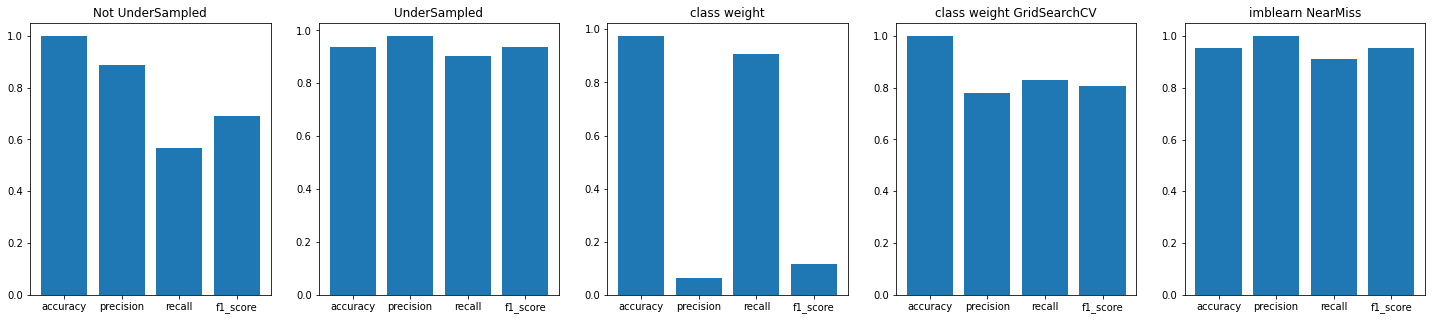

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))

plt.subplot(1,5,1).set_title("Not UnderSampled")
plt.bar(X_NU_points,Y_NU_points)

plt.subplot(1,5,2).set_title("UnderSampled")
plt.bar(X_US_points,Y_US_points)

plt.subplot(1,5,3).set_title("class weight")
plt.bar(X_CW_points,Y_CW_points)

plt.subplot(1,5,4).set_title("class weight GridSearchCV")
plt.bar(X_CV_points,Y_CV_points)

plt.subplot(1,5,5).set_title("imblearn NearMiss")
plt.bar(X_NM_points,Y_NM_points)

OverSampling

SMOTETomek

In [72]:
x_SMTK=df.iloc[:,0:-1]
y_SMTK=df.iloc[:,-1]

In [73]:
x_SMTK_train,x_SMTK_test,y_SMTK_train,y_SMTK_test=train_test_split(x_SMTK,y_SMTK,train_size=0.7)

In [74]:
scaler_SMTK=StandardScaler()
x_SMTK_train_sc=scaler_SMTK.fit_transform(x_SMTK_train)
x_SMTK_test_sc=scaler_SMTK.fit_transform(x_SMTK_test)

In [75]:
from imblearn.combine import SMOTETomek

In [76]:
smk=SMOTETomek(random_state=40)
x_smk_train,y_smk_train=smk.fit_sample(x_SMTK_train_sc,y_SMTK_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [77]:
x_smk_test,y_smk_test=smk.fit_sample(x_SMTK_test_sc,y_SMTK_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [78]:
LR_smk=LogisticRegression().fit(x_smk_train,y_smk_train)

In [79]:
pred_smk=LR_smk.predict(x_smk_test)

In [80]:
generate_report(y_smk_test,pred_smk)

{'accuracy': 0.9281258793734172,
 'f1_score': 0.9243434044233806,
 'precision': 0.9756904637832204,
 'recall': 0.8781305693649751}

Random Over Sampler

In [81]:
from imblearn.over_sampling import RandomOverSampler

In [82]:
x_ROS=df.iloc[:,0:-1]
y_ROS=df.iloc[:,-1]

In [83]:
x_ROS_train,x_ROS_test,y_ROS_train,y_ROS_test=train_test_split(x_ROS,y_ROS,train_size=0.7)

In [84]:
scaler_ROS=StandardScaler()
x_ROS_train_sc=scaler_ROS.fit_transform(x_ROS_train)
x_ROS_test_sc=scaler_ROS.fit_transform(x_ROS_test)

In [85]:
ros=RandomOverSampler(ratio=1)
x_ros_train,y_ros_train=ros.fit_sample(x_ROS_train_sc,y_ROS_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [86]:
x_ros_test,y_ros_test=ros.fit_sample(x_ROS_test_sc,y_ROS_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [87]:
LR_ros=LogisticRegression().fit(x_ros_train,y_ros_train)

In [88]:
pred_ros=LR_ros.predict(x_ros_test)

In [89]:
generate_report(y_ros_test,pred_ros)

{'accuracy': 0.9520239616426152,
 'f1_score': 0.9508818463865001,
 'precision': 0.9740705222779581,
 'recall': 0.928771555513874}

SMOTE

In [90]:
from imblearn.over_sampling import SMOTE

In [91]:
x_STE=df.iloc[:,0:-1]
y_STE=df.iloc[:,-1]

In [92]:
x_STE_train,x_STE_test,y_STE_train,y_STE_test=train_test_split(x_STE,y_STE,train_size=0.7)

In [94]:
scaler_sm=StandardScaler()
x_STE_train_sc=scaler_sm.fit_transform(x_STE_train)
x_STE_test_sc=scaler_sm.fit_transform(x_STE_test)

In [95]:
ste=SMOTE(random_state=40,ratio=1)
x_ste_train,y_ste_train=ste.fit_sample(x_STE_train_sc,y_STE_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [96]:
x_ste_test,y_ste_test=ste.fit_sample(x_STE_test_sc,y_STE_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [97]:
LR_ste=LogisticRegression().fit(x_ste_train,y_ste_train)

In [98]:
pred_ste=LR_ste.predict(x_ste_test)

In [99]:
generate_report(y_ste_test,pred_ste)

{'accuracy': 0.9581941171643278,
 'f1_score': 0.9575334635354643,
 'precision': 0.9729082219130014,
 'recall': 0.9426370766363029}

summary of oversampling

In [102]:
print("UnderSampling")
print("\n")
print("Not UnderSampled")
NU_points=generate_report(y_noSamp_test,pred_noSamp)
print(NU_points)

print("UnderSampled")
US_points=generate_report(y_uSamp_test,pred_uSamp)
print(US_points)

print("class weight")
CW_points=generate_report(y_CW_test,pred_CW)
print(CW_points)

print("class weight CV")
CV_points=generate_report(y_CW_test,pred_CWV)
print(CV_points)

print("imblearn NearMiss")
NM_points=generate_report(y_NM_test,pred_NM)
print(NM_points)

print("\n")

print("OverSampling")
print("\n")
print("SMOTETomek")
smtk_points=generate_report(y_smk_test,pred_smk)
print(smtk_points)

print("RandomOverSamler")
ros_points=generate_report(y_ros_test,pred_ros)
print(ros_points)

print("SMOTE")
smt_points=generate_report(y_ste_test,pred_ste)
print(smt_points)

UnderSampling


Not UnderSampled
{'accuracy': 0.9991105181231933, 'precision': 0.8854166666666666, 'recall': 0.5666666666666667, 'f1_score': 0.6910569105691056}
UnderSampled
{'accuracy': 0.9391891891891891, 'precision': 0.9788732394366197, 'recall': 0.9025974025974026, 'f1_score': 0.9391891891891893}
class weight
{'accuracy': 0.9749657666514518, 'precision': 0.06181015452538632, 'recall': 0.9090909090909091, 'f1_score': 0.11575031004547334}
class weight CV
{'accuracy': 0.9992743700478681, 'precision': 0.7804878048780488, 'recall': 0.8311688311688312, 'f1_score': 0.8050314465408805}
imblearn NearMiss
{'accuracy': 0.9548872180451128, 'precision': 1.0, 'recall': 0.9097744360902256, 'f1_score': 0.952755905511811}


OverSampling


SMOTETomek
{'accuracy': 0.9281258793734172, 'precision': 0.9756904637832204, 'recall': 0.8781305693649751, 'f1_score': 0.9243434044233806}
RandomOverSamler
{'accuracy': 0.9520239616426152, 'precision': 0.9740705222779581, 'recall': 0.928771555513874, 'f1_score': 0

In [103]:
X_SMOTETomek_points = list(smtk_points.keys())
Y_SMOTETomek_points = list(smtk_points.values())

X_ros_points = list(ros_points.keys())
Y_ros_points = list(ros_points.values())

X_smt_points = list(smt_points.keys())
Y_smt_points = list(smt_points.values())

<BarContainer object of 4 artists>

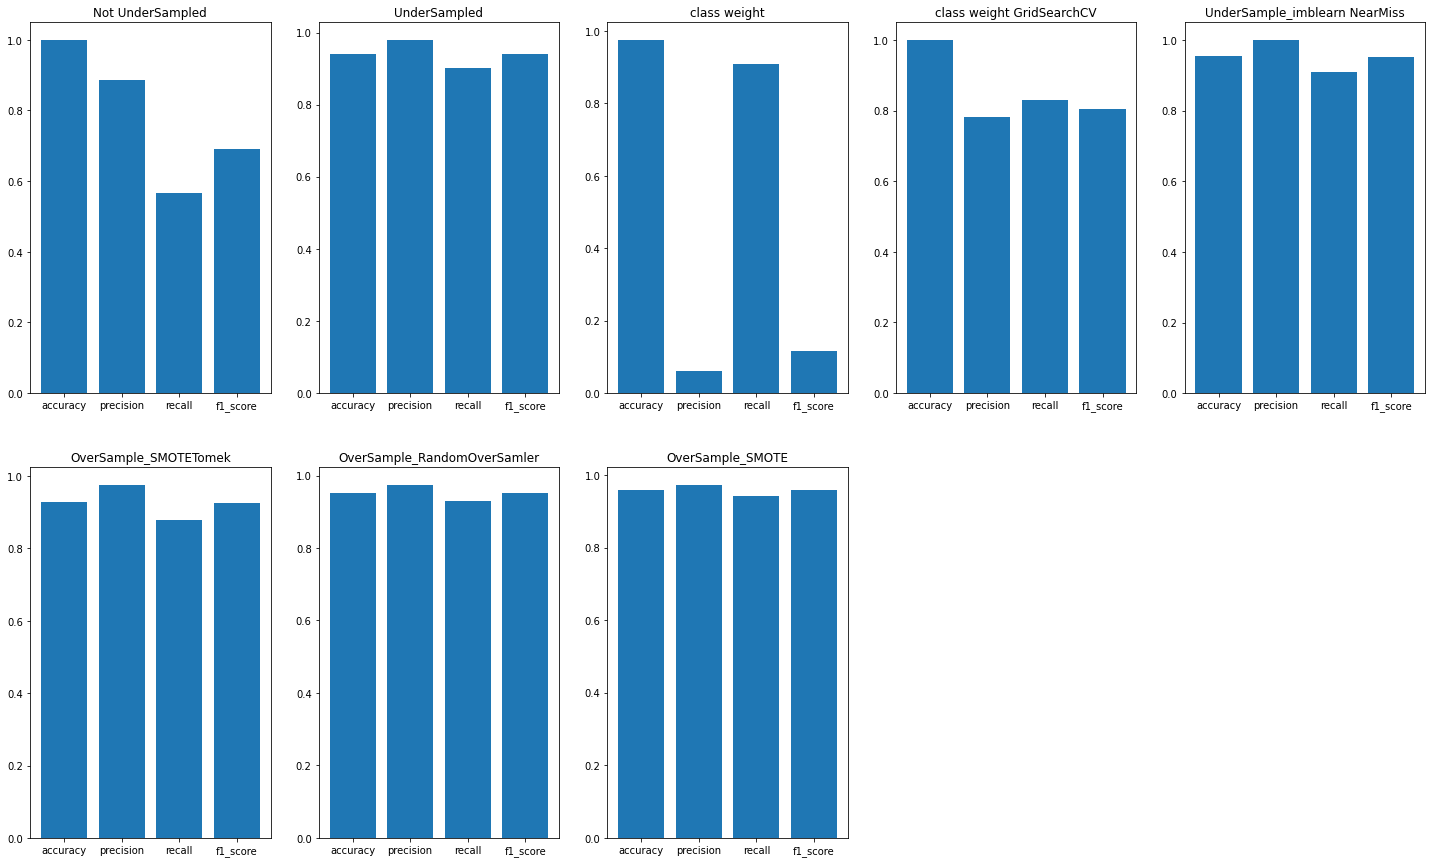

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))

plt.subplot(2,5,1).set_title("Not UnderSampled")
plt.bar(X_NU_points,Y_NU_points)

plt.subplot(2,5,2).set_title("UnderSampled")
plt.bar(X_US_points,Y_US_points)

plt.subplot(2,5,3).set_title("class weight")
plt.bar(X_CW_points,Y_CW_points)

plt.subplot(2,5,4).set_title("class weight GridSearchCV")
plt.bar(X_CV_points,Y_CV_points)

plt.subplot(2,5,5).set_title("UnderSample_imblearn NearMiss")
plt.bar(X_NM_points,Y_NM_points)

plt.subplot(2,5,6).set_title("OverSample_SMOTETomek")
plt.bar(X_SMOTETomek_points,Y_SMOTETomek_points)

plt.subplot(2,5,7).set_title("OverSample_RandomOverSamler")
plt.bar(X_ros_points,Y_ros_points)

plt.subplot(2,5,8).set_title("OverSample_SMOTE")
plt.bar(X_smt_points,Y_smt_points)